<h1 style="text-align: center;">Predictive Modeling and Analysis of Severity of Collisions</h1>

<img src="img1.jpg"/>
<h1></h1>
<p>&nbsp;</p>


Importing the required libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, validation_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import itertools
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

<h1></h1>
<p>&nbsp;</p>

## Gradient Boosting Method
Gradient Boosting is an ensemble machine learning technique that builds a powerful predictive model by combining the predictions of several weak learners, usually decision trees. It iteratively fits new models to the errors made by previous models, minimizing the overall prediction error, resulting in a highly accurate and robust model.
<h1></h1>
<p>&nbsp;</p>
By using fit transform we are converting objects or specific strings into numbers

In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv(r"C:\Users\rehaa\OneDrive\Desktop\Technalytics_round3_dataset.csv")
encoder = LabelEncoder()

#by using fit transform we aare converting objects or specific strings into numbers
data['COLLISIONTYPE'] = encoder.fit_transform(data['COLLISIONTYPE'])
data['UNDERINFL'] = encoder.fit_transform(data['UNDERINFL'])
data['SPEEDING'] = encoder.fit_transform(data['SPEEDING'])
data['JUNCTIONTYPE'] = encoder.fit_transform(data['JUNCTIONTYPE'])
data['WEATHER'] = encoder.fit_transform(data['WEATHER'])
data['INATTENTIONIND'] = encoder.fit_transform(data['INATTENTIONIND'])
data['ROADCOND'] = encoder.fit_transform(data['ROADCOND'])
data['SPEEDING'] = encoder.fit_transform(data['SPEEDING'])
data['HITPARKEDCAR'] = encoder.fit_transform(data['HITPARKEDCAR'])
data['intersection_related'] = encoder.fit_transform(data['intersection_related'])
data['SPDCASENO'] = encoder.fit_transform(data['SPDCASENO'])
data['DATE'] = encoder.fit_transform(data['DATE'])


<h1></h1>
<p>&nbsp;</p>

### CLEANING THE TRAINING DATA  
It cleans the data by replacing the empty values by zero so that we can analyse these columns.
After this all the data is now converted to numerical columns and now we can analyse it easily
Splits the dataset into training and testing sets and initializes the Gradient Boosting Classifier which trains the model and makes predictions on the splitted training dataset.Then it evaluates the model by checking the accuracy using the SKLEARN library.

In [50]:
data['response_type'].replace(np.nan,0,inplace=True)
data['response_time'].replace(np.nan,0,inplace=True)
data['SNOW'].replace(np.nan,0,inplace=True)
data['SNWD'].replace(np.nan,0,inplace=True)
data['WSF5'].replace(np.nan,0,inplace=True)
data.replace(to_replace={'Unknown': np.nan,'Other':np.nan}, inplace=True)
data.dropna(inplace=True)
data = data.drop(columns=['response_type'])


X = data.drop(columns=['SEVERITYCODE'])
y = data['SEVERITYCODE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Train the model
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_prediction = gbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
report = classification_report(y_test, y_prediction)

print(f'Accuracy: {accuracy}')
print(report)
data.info()

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57536
           1       1.00      1.00      1.00     30298
           2       1.00      1.00      1.00      1516
           3       1.00      1.00      1.00       156

    accuracy                           1.00     89506
   macro avg       1.00      1.00      1.00     89506
weighted avg       1.00      1.00      1.00     89506

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            111882 non-null  int64  
 1   longitude             111882 non-null  float64
 2   latitude              111882 non-null  float64
 3   SEVERITYCODE          111882 non-null  int64  
 4   COLLISIONTYPE         111882 non-null  int32  
 5   PERSONCOUNT           111882 non-null  int64  
 6   PEDCOUNT           

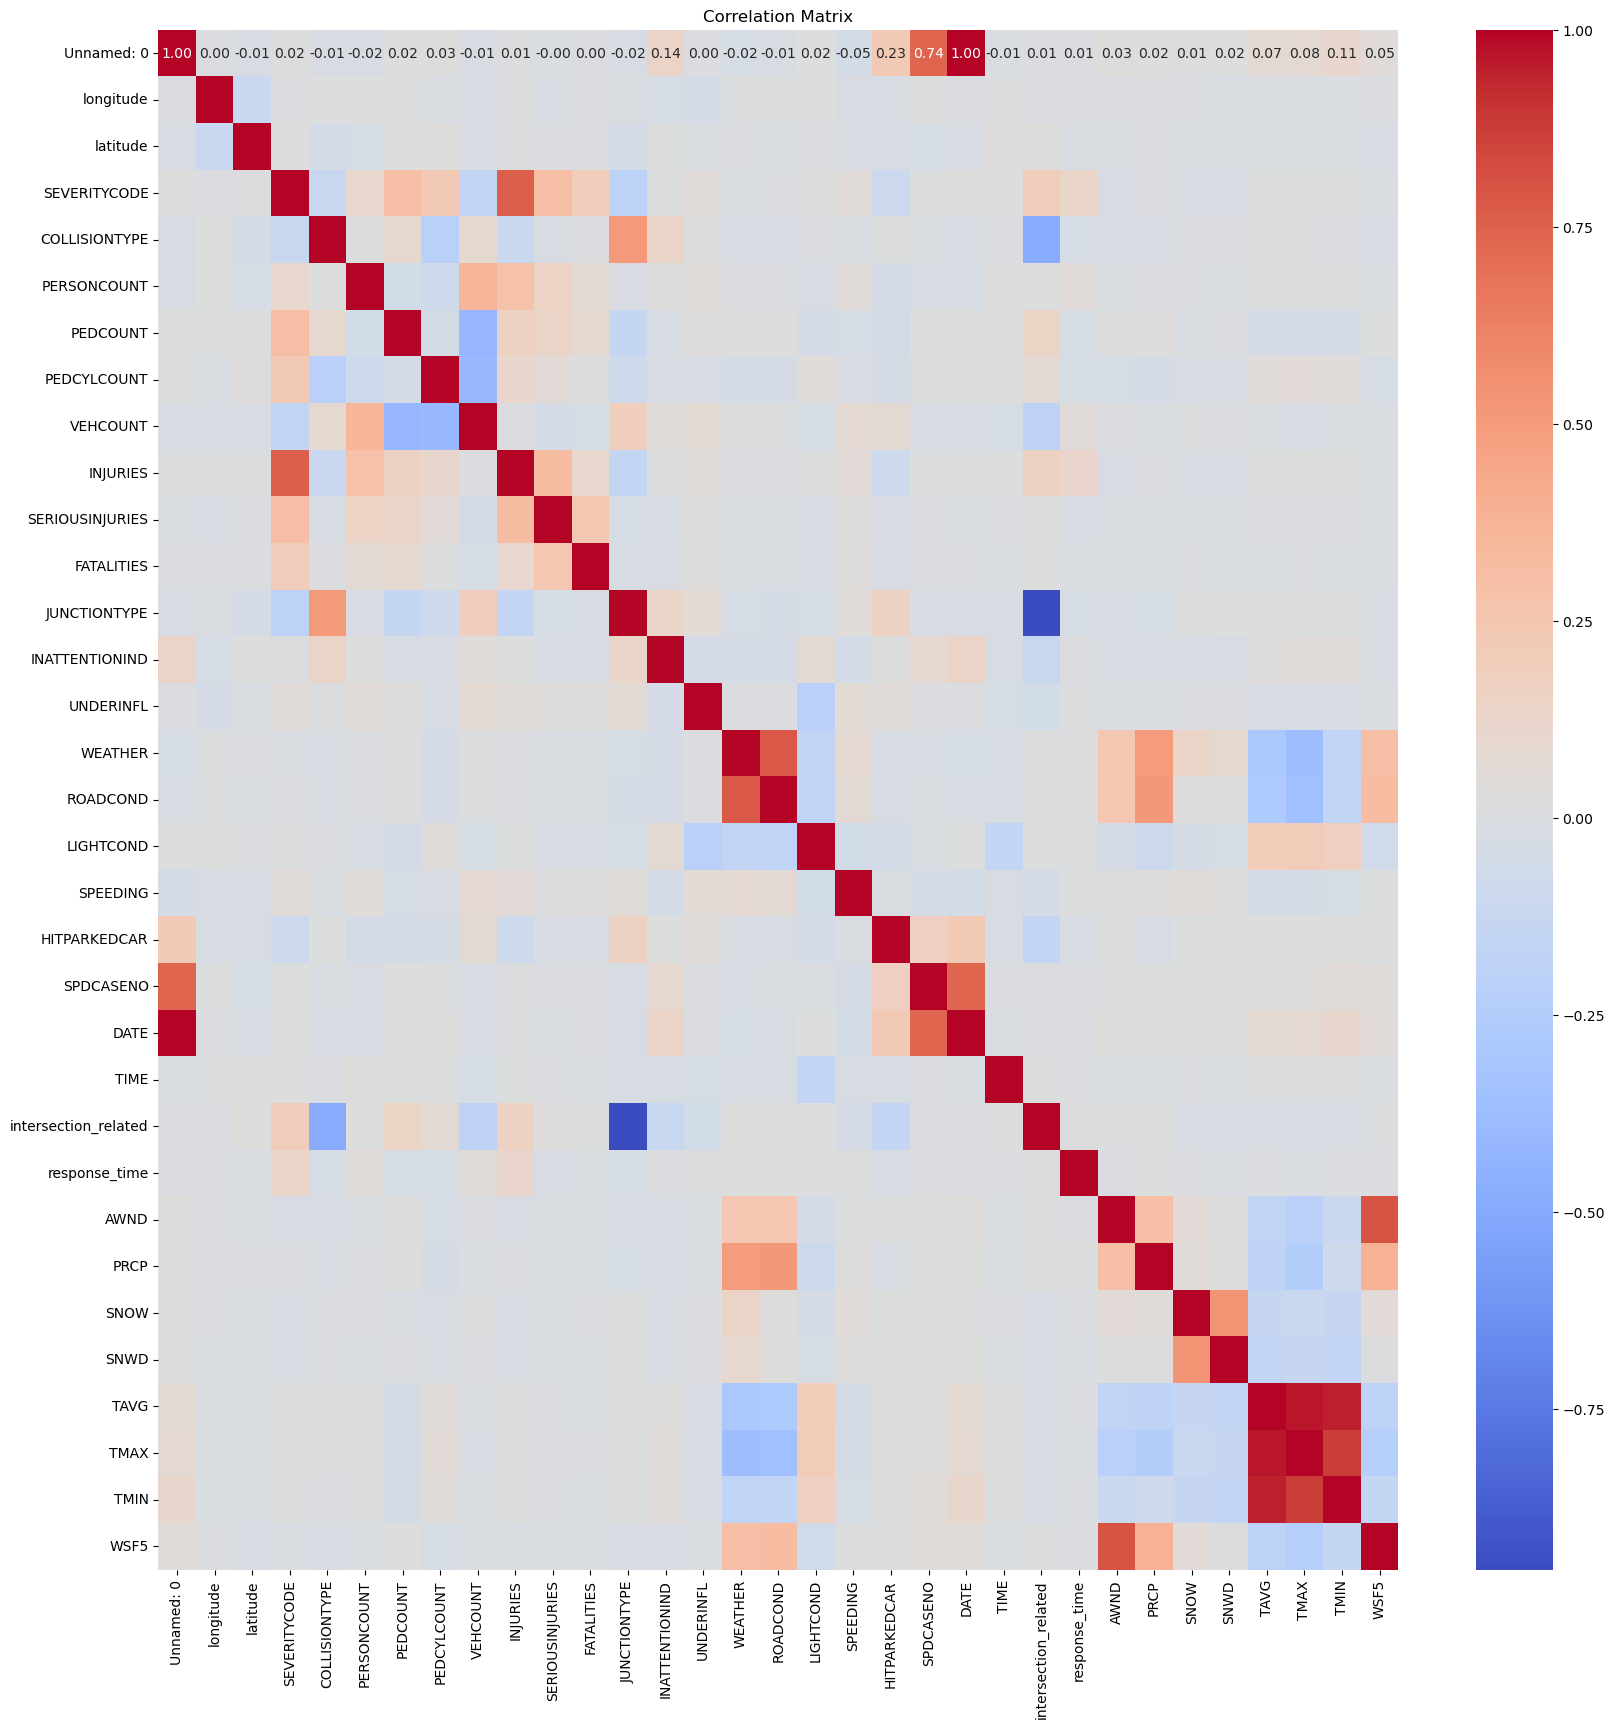

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

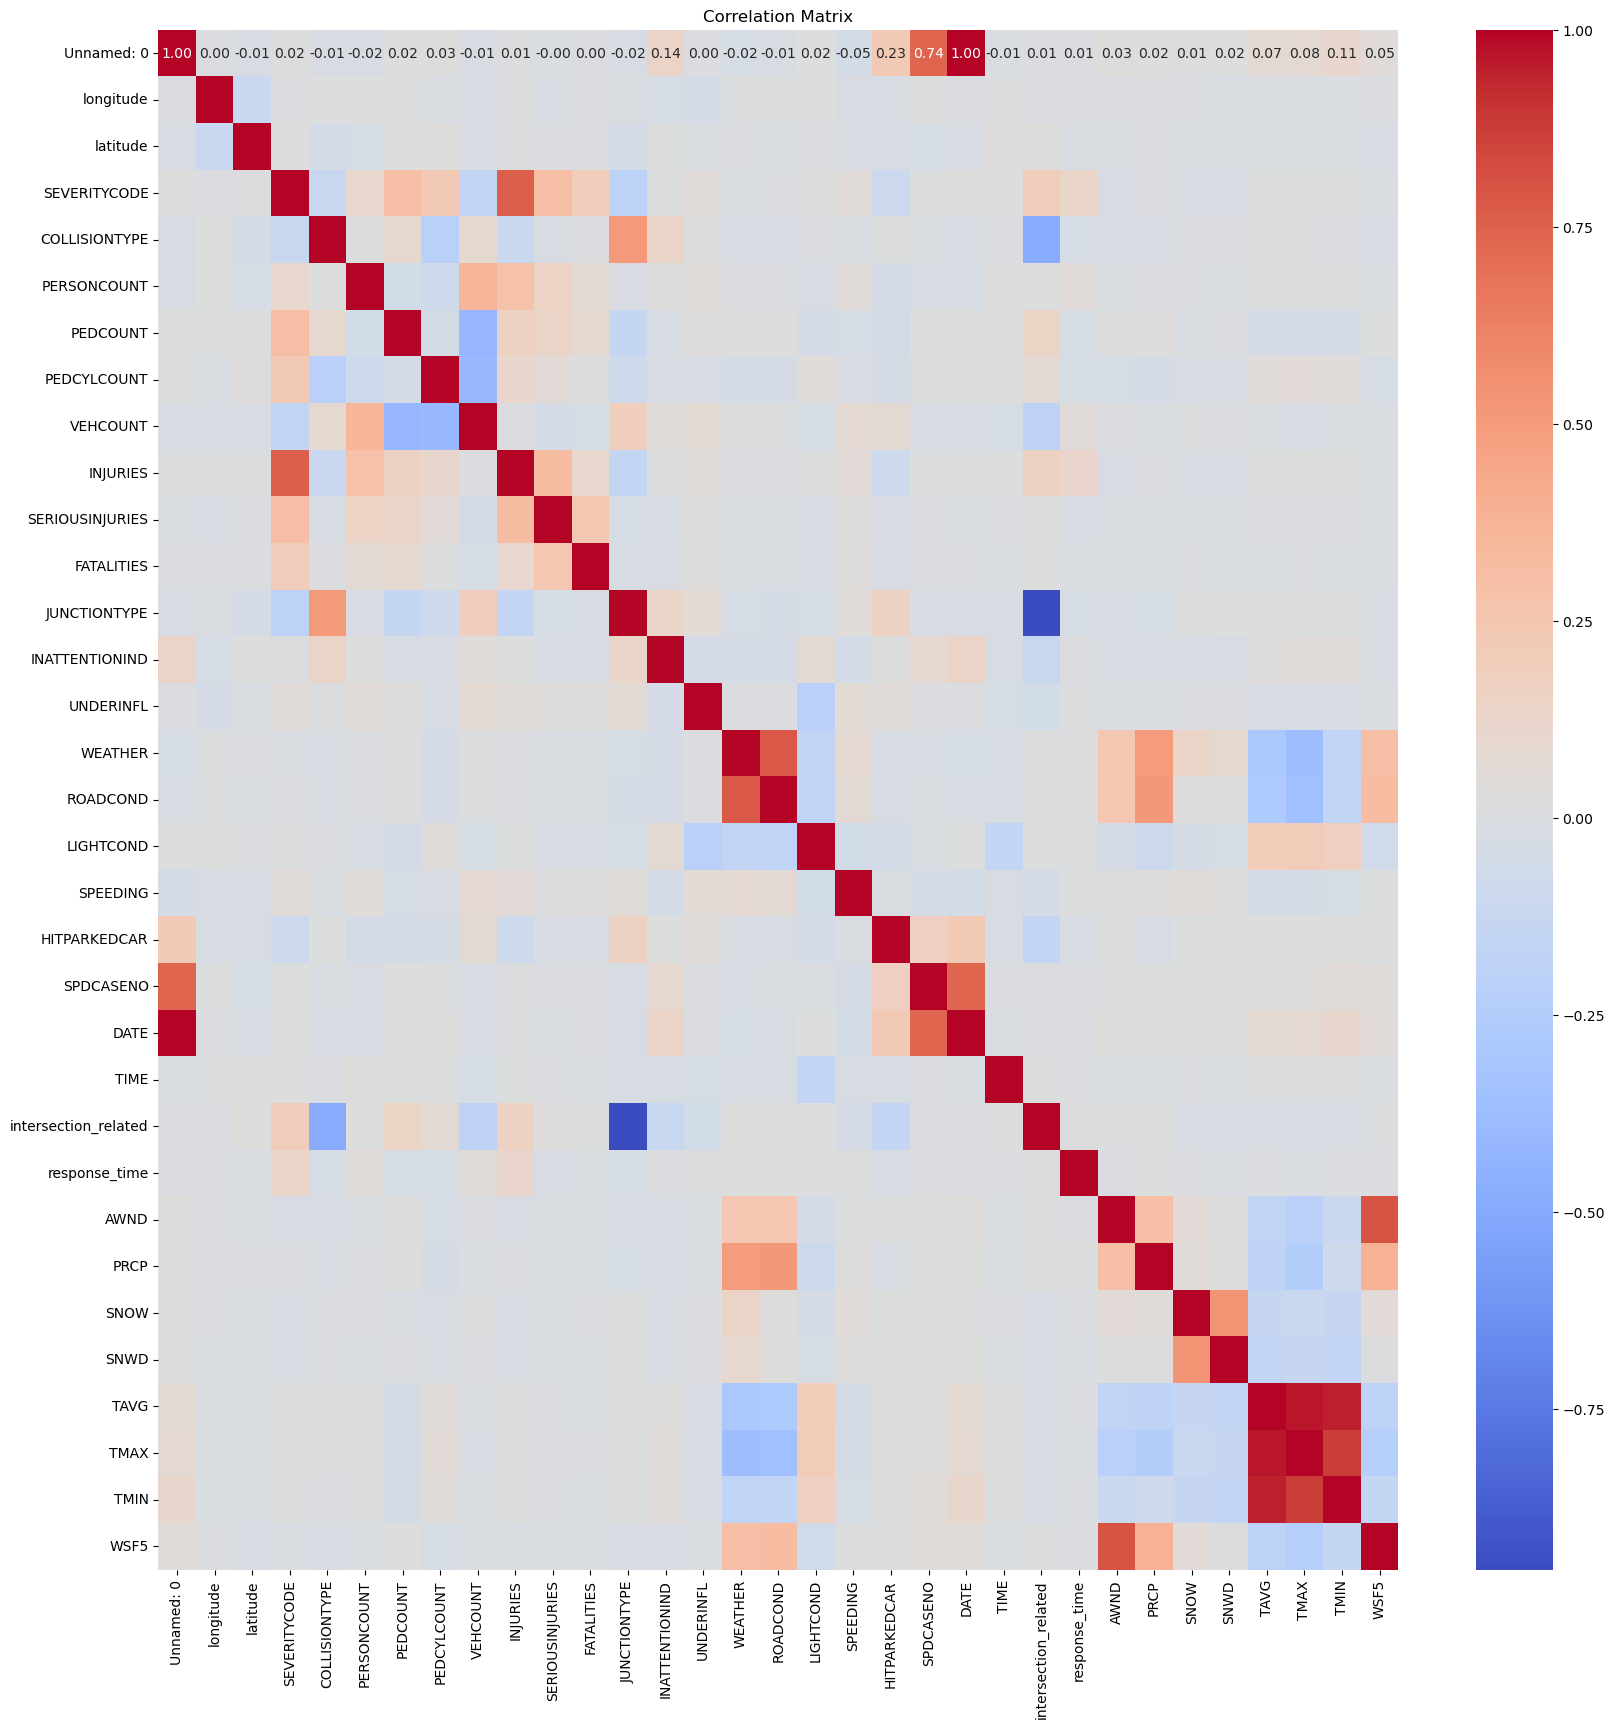

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

<h1></h1>
<p>&nbsp;</p>
We know that the data belongs to Seattle, a thriving metropolis nestled in the heart of the Pacific Northwest, is renowned for its robust tech sector, boasting the headquarters of global tech giants Microsoft and Amazon. The city, characterized by its high socio-economic status and rapid pace of life, is on a determined quest to enhance the quality of life for its residents. However, the city grapples with a significant challenge: traffic congestion.

In its quest to alleviate the traffic congestion, Seattle is leveraging a vast dataset containing collision data compiled over several years. This comprehensive dataset encapsulates a plethora of information related to the causative factors behind the collisions.
<h1></h1>
<p>&nbsp;</p>

### TESTING THE DATA AND VIEWING THE HEAD OF THE TEST CSV FILE
It reads the csv file and then transforms some columns to numerical data so 
that it can be analysed.


In [23]:
test=pd.read_csv("test.csv")


test['COLLISIONTYPE'] = encoder.fit_transform(test['COLLISIONTYPE'])
test['UNDERINFL'] = encoder.fit_transform(test['UNDERINFL'])
test['SPEEDING'] = encoder.fit_transform(test['SPEEDING'])
test['JUNCTIONTYPE'] = encoder.fit_transform(test['JUNCTIONTYPE'])
test['WEATHER'] = encoder.fit_transform(test['WEATHER'])
test['INATTENTIONIND'] = encoder.fit_transform(test['INATTENTIONIND'])
test['ROADCOND'] = encoder.fit_transform(test['ROADCOND'])
test['SPEEDING'] = encoder.fit_transform(test['SPEEDING'])
test['HITPARKEDCAR'] = encoder.fit_transform(test['HITPARKEDCAR'])
test['intersection_related'] = encoder.fit_transform(test['intersection_related'])
test['SPDCASENO'] = encoder.fit_transform(test['SPDCASENO'])
test['DATE'] = encoder.fit_transform(test['DATE'])
test.head()

,Unnamed: 0.1,Unnamed: 0,longitude,latitude,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,SPDCASENO,DATE,TIME,intersection_related,response_type,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
0,67915,67916,-122.346179,47.703847,2,2,0,0,2,0,0,0,2,0,0,4,6,3,0,0,13722,2886,9.250000,0,NaN,NaN,8.95,0.15,0.0,0.0,62.0,68,55,29.1
1,22738,22739,-122.350784,47.613079,4,2,0,0,2,0,0,0,2,1,0,1,0,1,0,0,5673,827,22.333333,0,NaN,NaN,7.83,0.00,NaN,NaN,43.0,51,35,21.0
2,13897,13898,-122.312630,47.623909,4,2,0,0,2,0,0,0,2,1,0,4,6,1,0,0,3351,482,16.966667,0,Motor Vehicle Accident,11.0,8.28,0.54,NaN,NaN,43.5,47,40,25.9
3,24279,24280,-122.347107,47.630123,8,2,0,0,2,0,0,0,2,0,0,1,0,3,0,0,17611,892,16.933333,0,NaN,NaN,4.25,0.00,NaN,NaN,57.5,66,49,14.1
4,59239,59240,-122.346309,47.733984,0,2,0,0,2,2,0,0,1,0,0,1,0,3,0,0,12216,2493,16.950000,0,NaN,NaN,6.26,0.00,0.0,0.0,51.0,64,39,23.9


<h1></h1>
<p>&nbsp;</p>

### CLEANING THE DATA  
It cleans the data by replacing the empty values by zero so that we can analyse these columns and then gives a glimpse of the TEST data.

In [24]:
test['response_type'].replace(np.nan,0,inplace=True)
test['response_time'].replace(np.nan,0,inplace=True)
test['SNOW'].replace(np.nan,0,inplace=True)
test['SNWD'].replace(np.nan,0,inplace=True)
test['WSF5'].replace(np.nan,0,inplace=True)
test.replace(to_replace={'Unknown': np.nan,'Other':np.nan}, inplace=True)
test.dropna(inplace=True)
test = test.drop(columns=['response_type'])
test.head()

,Unnamed: 0.1,Unnamed: 0,longitude,latitude,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,SPDCASENO,DATE,TIME,intersection_related,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
0,67915,67916,-122.346179,47.703847,2,2,0,0,2,0,0,0,2,0,0,4,6,3,0,0,13722,2886,9.250000,0,0.0,8.95,0.15,0.0,0.0,62.0,68,55,29.1
1,22738,22739,-122.350784,47.613079,4,2,0,0,2,0,0,0,2,1,0,1,0,1,0,0,5673,827,22.333333,0,0.0,7.83,0.00,0.0,0.0,43.0,51,35,21.0
2,13897,13898,-122.312630,47.623909,4,2,0,0,2,0,0,0,2,1,0,4,6,1,0,0,3351,482,16.966667,0,11.0,8.28,0.54,0.0,0.0,43.5,47,40,25.9
3,24279,24280,-122.347107,47.630123,8,2,0,0,2,0,0,0,2,0,0,1,0,3,0,0,17611,892,16.933333,0,0.0,4.25,0.00,0.0,0.0,57.5,66,49,14.1
4,59239,59240,-122.346309,47.733984,0,2,0,0,2,2,0,0,1,0,0,1,0,3,0,0,12216,2493,16.950000,0,0.0,6.26,0.00,0.0,0.0,51.0,64,39,23.9


<h1></h1>
<p>&nbsp;</p>

Here we passed the complete train data into the gbm class then subsequently printing the predictions


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

ValueError: could not convert string to float: 'Parked Car'

In [25]:
gbm.fit(X, y)
test_prediction = gbm.predict(test)
print(test_prediction)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Unnamed: 0.1


<h1></h1>
<p>&nbsp;</p>
AFTER THIS SAVE THIS TEST PREDICTION IN A CSV FILE 


In [ ]:
predictions_df = pd.DataFrame({'y': test_prediction})
# Save the DataFrame to a CSV file
predictions_df.to_csv('C-315_predictions.csv',index=False)

<h1></h1>
<p>&nbsp;</p>

### MAP CREATED WITH LOCATIONS MARKED ON THE BASIS OF THE SEVERITY CODE
If the severity code is zero then the location is green colored, similarly yellow for 
one, orange for two, red for three

In [ ]:
map = folium.Map(location=[47.606209, -122.332069], zoom_start=10)
map_clust = MarkerCluster().add_to(map)
location = data[['latitude', 'longitude']][data['longitude'].notnull()][:78000]
loc = location.values.tolist()

for i in range(len(loc)):
    # Extract severity code for each location
    severity_code = y.iloc[i]
    
    # Set color based on severity code
    if severity_code == 1:
        color = 'yellow'
    elif severity_code == 2:
        color = 'orange'
    elif severity_code == 3:
        color = 'red'
    else:
        color = 'green'
    
    # Create a Marker with the specified color and add to the MarkerCluster
    folium.Marker(loc[i], icon=folium.Icon(color=color)).add_to(map_clust)
map

<h1></h1>
<p>&nbsp;</p>

### ANALYSIS OF SEVERE ACCIDENTS 

In [54]:
severity_code_counts=data1['COLLISIONTYPE'].value_counts().to_frame('counts')

total_entries = len(data1)
severity_code_percentage = (severity_code_counts / total_entries) * 100
severity_code_info = pd.DataFrame({'counts': severity_code_counts['counts'], 'percentage': severity_code_percentage['counts']})
severity_code_counts.index.name='Severity Code'
styled_df = severity_code_info.style.set_properties(**{'text-align': 'left'})
styled_df

,counts,percentage
Severity Code,,
Angles,18442,23.547889
Parked Car,17246,22.020762
Rear Ended,16376,20.909892
Sideswipe,9086,11.601568
Left Turn,7223,9.222774
Pedestrian,4095,5.228750
Cycles,3234,4.129372
Right Turn,1506,1.922954
Head On,1109,1.416040


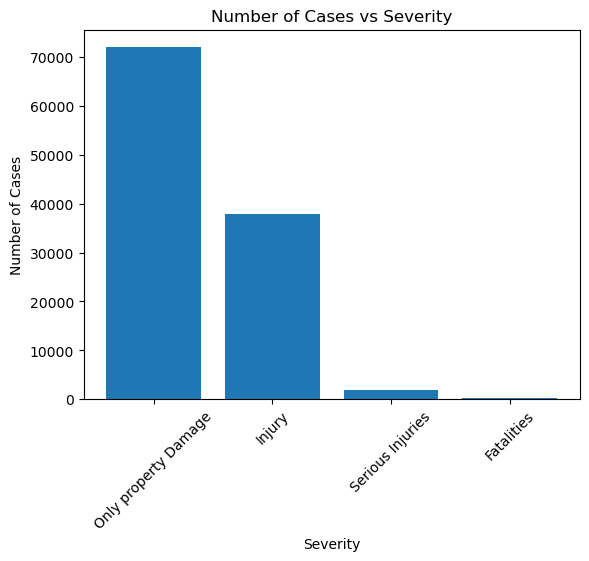

In [26]:
data1=pd.read_csv(r"C:\Users\rehaa\OneDrive\Desktop\Technalytics_round3_dataset.csv")
data1['response_type'].replace(np.nan,0,inplace=True)
data1['response_time'].replace(np.nan,0,inplace=True)
data1['SNOW'].replace(np.nan,0,inplace=True)
data1['SNWD'].replace(np.nan,0,inplace=True)
data1['WSF5'].replace(np.nan,0,inplace=True)
data1.replace(to_replace={'Unknown': np.nan,'Other':np.nan}, inplace=True)
data1.dropna(inplace=True)
data1['SEVERITYCODE'] = data1['SEVERITYCODE'].astype(str)

# Replace severity code values with corresponding descriptions
data1['SEVERITYCODE'].replace({'0': 'Only property Damage',
                                '1': 'Injury',
                                '2': 'Serious Injuries',
                                '3': 'Fatalities'}, inplace=True)

# Count the occurrences of each severity code
severity_counts = data1['SEVERITYCODE'].value_counts()

# Extract the severity conditions (codes) and counts as lists
severity_conditions = severity_counts.index.tolist()
counts = severity_counts.tolist()

# Plotting the bar chart
plt.bar(severity_conditions, counts)
plt.xlabel('Severity')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Severity')
plt.xticks(rotation=45)
plt.show()

<h1></h1>
<p>&nbsp;</p>

### COLLISION TYPES WITH THEIR FREQUENCIES AND PERCENTAGE
 By categorizing collision types and their frequencies, we discern prevalent accident patterns. This data aids in prioritizing safety measures, such as targeted interventions and infrastructure improvements, reducing the likelihood of recurring incidents. Understanding collision distribution enables strategic resource allocation for enhanced road safety and accident prevention.

In [45]:
collision_counts = data1['PEDCYLCOUNT'].value_counts()
total_entries = len(data1)
collision_percentage = (collision_counts / total_entries) * 100
collision_info = pd.DataFrame({'counts': collision_counts, 'percentage': collision_percentage})
collision_counts.index.name='Collision Type'
collision_info.head(15)

,counts,percentage
Collision Type,,
0,75073,95.857860
1,3215,4.105111
2,29,0.037029


In [47]:
import pandas as pd

# Assuming 'SEVERITYCODE' is the column containing severity codes
severity_counts = data1.groupby('PEDCYLCOUNT')['SEVERITYCODE'].value_counts()

# Convert the counts to percentages
total_entries = len(data1)
severity_percentage = (severity_counts / total_entries) * 100

# Create a DataFrame to store the counts and percentages
severity_info = pd.DataFrame({'counts': severity_counts, 'percentage': severity_percentage})

# Rename the index for better readability
severity_info.index.names = ['PEDCYLCOUNT', 'Severity Code']

# Display the information for the first 15 rows
print(severity_info.head(200))


                                   counts  percentage
PEDCYLCOUNT Severity Code                            
0           only property damage    49991   63.831607
            Injury                  23883   30.495295
            Serious Injuries         1077    1.375180
            Fatalities                122    0.155777
1           Injury                   2617    3.341548
            only property damage      361    0.460947
            Serious Injuries          221    0.282186
            Fatalities                 16    0.020430
2           Injury                     25    0.031922
            Serious Injuries            4    0.005107


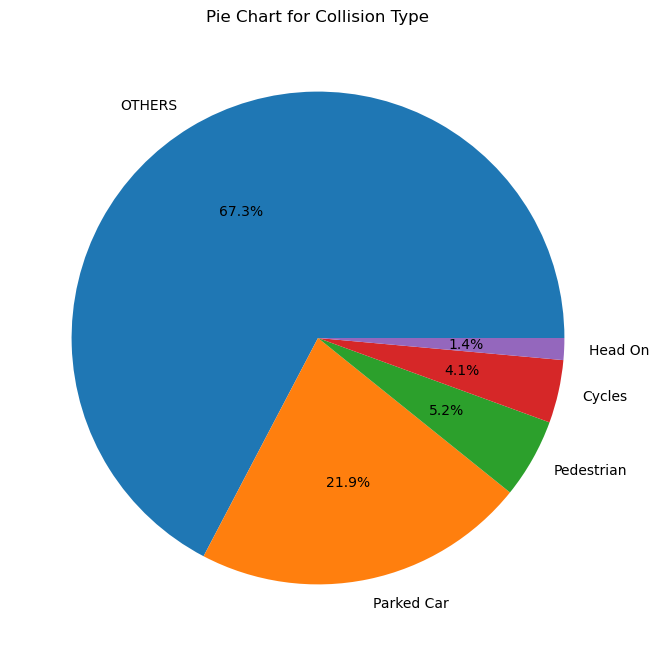

In [30]:
data1['COLLISIONTYPE'].replace('Angles', 'OTHERS',inplace=True)
data1['COLLISIONTYPE'].replace('Rear Ended','OTHERS',inplace=True)
data1['COLLISIONTYPE'].replace('Sideswipe','OTHERS',inplace=True)
data1['COLLISIONTYPE'].replace('Left Turn','OTHERS',inplace=True)
data1['COLLISIONTYPE'].replace('Right Turn','OTHERS',inplace=True)

collision_types=data1['COLLISIONTYPE'].value_counts()
plt.figure(figsize=(8, 8))
collision_types.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.ylabel('')
plt.title('Pie Chart for Collision Type')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### TABLE SHOWING YEARS WITH THE MOST ACCIDENTS
Year-wise total accidents provide a snapshot of road safety trends. Analyzing these figures can uncover patterns or changes over time, influencing policy decisions and resource allocation. For instance, an upward trend may indicate a need for enhanced safety measures, while a decline could signal successful interventions or changing road usage patterns.

In [31]:
data1 = pd.read_csv('train.csv')
data1['YEAR'] = pd.to_datetime(data1['DATE']).dt.year
# Calculate the frequency of each year
year_counts = data1['YEAR'].value_counts()
yearr_counts=data1['YEAR'].value_counts().to_frame('counts')
yearr_counts.index.name='Year'
yearr_counts.head()

,counts
Year,
2014,5930
2016,5902
2018,5728
2010,5698
2012,5562


<h1></h1>
<p>&nbsp;</p>

### LINE GRAPH SHOWING NUMBER OF CASES EACH YEAR 

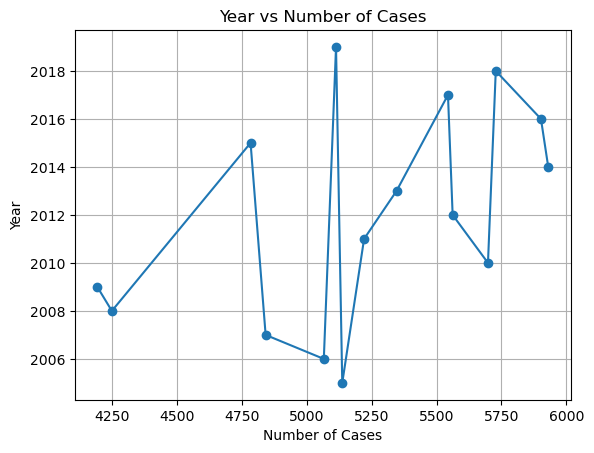

In [32]:
plt.plot( year_counts.values, year_counts.index, marker='o')  # 'o' adds markers to data points
plt.xlabel('Number of Cases')
plt.ylabel('Year')
plt.title('Year vs Number of Cases')
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()

<h1></h1>
<p>&nbsp;</p>

### AVERAGE TEMPERATURE ON DAY OF COLLISION
In the provided data, accidents peak during moderate temperatures, indicating a non-linear relationship with temperature. Extreme temperatures might deter driving or amplify risks, while moderate conditions foster higher vehicle usage and potentially relaxed driving behaviors, contributing to increased accident occurrences.


In [ ]:
TAVG_counts=data1['TAVG'].value_counts().to_frame('counts')
TAVG_counts.index.name='TAVG'
TAVG_counts.head()

<h1></h1>
<p>&nbsp;</p>

### LINE GRAPH




In [ ]:
tavg_counts = data1['TAVG'].value_counts()
plt.plot(tavg_counts.values, tavg_counts.index)
plt.xlabel('Number of Cases')
plt.ylabel('Average Temperature')
plt.title(' Average Temperature vs Number of Cases ')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### PRECIPITATION ON DAY OF COLLISION
The data indicates that the majority of accidents occur on days with no precipitation. However, as precipitation increases incrementally, the number of accidents declines steadily. This suggests that even minimal precipitation can influence road conditions and driver behavior, emphasizing the importance of caution during adverse weather conditions.

In [ ]:
prcp_counts=data1['PRCP'].value_counts().to_frame('counts')
prcp_counts.index.name='PRCP'
prcp_counts.head(2000)

<h1></h1>
<p>&nbsp;</p>

### GRAPH SHOWING PRECIPITATION ON DAY OF COLLISION VS NUMBER OF CASES

In [ ]:
prcp_counts_filtered = data1[data1['PRCP'] != 0]['PRCP'].value_counts()
plt.plot( prcp_counts_filtered.values, prcp_counts_filtered.index)
plt.xlabel('Number of Cases')
plt.ylabel('Precipitation on day of collision')
plt.title('Precipitation on day of collision vs Number of Cases ')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### SNOW ON DAY OF COLLISION
Analysis: The majority of collisions occurred when there was no snow (0.0) on the day, indicating that snowfall is not a significant factor in most accidents. However, a notable number of accidents did occur with small amounts of snow, suggesting that even light snowfall can contribute to hazardous road conditions and increased accident risk.

In [ ]:
snow_counts=data['SNOW'].value_counts().to_frame('counts')
snow_counts.index.name='SNOW'
snow_counts.head(10)

<h1></h1>
<p>&nbsp;</p>

### GRAPH SHOWING NUMBER OF CASES VS SNOW ON DAY OF COLLISION

In [ ]:

snow_counts_filtered = data[data['SNOW'] != 0]['SNOW'].value_counts()
plt.plot( snow_counts_filtered.values, snow_counts_filtered.index)
plt.xlabel('Number of Cases')
plt.ylabel('Snow on day of collision')
plt.title('Snow on day of collision vs Number of Cases ')
plt.show()


<h1></h1>
<p>&nbsp;</p>

### SNOW DEPTH ON DAY OF COLLISION
The data presents the frequency of snowfall (in inches) on the day of collisions, with most occurrences at 0 inches. As snow depth increases, the number of accidents generally decreases, likely due to fewer vehicles on the road or increased caution. However, isolated instances of accidents persist at higher snowfall levels, warranting cautious driving measures.

In [ ]:
snwd_counts=data1['SNWD'].value_counts().to_frame('counts')
snwd_counts.index.name='SNWD'
snwd_counts.head(10)

<h1></h1>
<p>&nbsp;</p>

### GRAPH SHOWING SNOW DEPTH ON DAY OF COLLSION VS NUMBER OF CASES

In [ ]:

snwd_counts_filtered = data1[data1['SNWD'] != 0]['SNWD'].value_counts()
plt.plot( snwd_counts_filtered.values, snwd_counts_filtered.index)
plt.xlabel('Number of Cases')
plt.ylabel('Snow Depth on Day Of Collision')
plt.title('Snow Depth on Day Of Collision vs Number of Cases ')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### AVERAGE WIND SPEED ON DAY OF COLLISION
The data illustrates the relationship between wind speed on the day of collision and the number of accidents. There appears to be a trend of decreasing accident frequency as wind speed increases, suggesting that lower wind speeds may create more favorable driving conditions. However, caution should be exercised during extreme wind events.

In [ ]:
awnd_counts=data1['AWND'].value_counts().to_frame('counts')
awnd_counts.index.name='AWND'
awnd_counts.head(10)


<h1></h1>
<p>&nbsp;</p>

### AVERAGE WIND SPEED v/s CASES

In [ ]:
awnd_counts = data1['AWND'].value_counts()
plt.plot(awnd_counts.values, awnd_counts.index)
plt.xlabel('Number of Cases')
plt.ylabel('Average wind speed on day of collision')
plt.title('Average wind speed on day of collision vs Number of Cases ')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### TABLE SHOWING RESPONSE TYPE, THEIR COUNTS AND PERCENTAGE
The data illustrates the distribution of accidents across various response types. Motor Vehicle Accidents and Incidents comprise the majority, with Freeway incidents being relatively lower. Notably, Car Fires and Medic Responses also contribute, albeit less frequently. Understanding response-specific accident frequencies aids emergency preparedness and resource allocation, ensuring efficient response to diverse incident types and locations.

In [ ]:
response_type_counts = data1['response_type'].value_counts().to_frame('counts')
total_entries = len(data1)
response_type_percentage = (response_type_counts / total_entries) * 100
response_type_info = pd.DataFrame({'counts': response_type_counts['counts'], 'percentage': response_type_percentage['counts']})
response_type_counts.index.name='Response Type'
response_type_info.rename(columns={'index': 'response_type'}, inplace=True)
response_type_info.head(15)

<h1></h1>
<p>&nbsp;</p>

### BAR GRAPH SHOWING NUMBER OF CASES VS RESPONSE TYPE

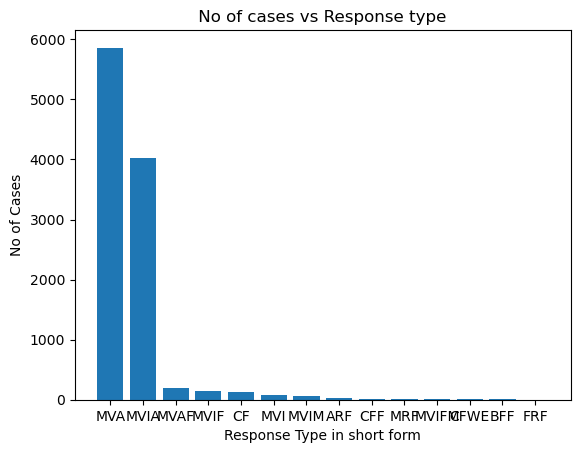

In [33]:
data1['response_type'].replace('Motor Vehicle Accident', 'MVA',inplace=True)
data1['response_type'].replace('MVI - Motor Vehicle Incident','MVIA',inplace=True)
data1['response_type'].replace('Motor Vehicle Accident Freeway','MVAF',inplace=True)
data1['response_type'].replace('MVI Freeway','MVIF',inplace=True)
data1['response_type'].replace('Car Fire','CF',inplace=True)
data1['response_type'].replace('Motor Vehicle Incident','MVI',inplace=True)
data1['response_type'].replace('MVI Medic','MVIM',inplace=True)
data1['response_type'].replace('Aid Response Freeway','ARF',inplace=True)
data1['response_type'].replace('MVI Freeway Medic','MVIFM',inplace=True)
data1['response_type'].replace('Car Fire W/Exp.','CFWE',inplace=True)
data1['response_type'].replace('Brush Fire Freeway','BFF',inplace=True)
data1['response_type'].replace('Fire Response Freeway', 'FRF',inplace=True)
data1['response_type'].replace('Motor Vehicle Incident Freeway', 'MVIF',inplace=True)
data1['response_type'].replace('Car Fire Freeway', 'CFF',inplace=True)
data1['response_type'].replace('Medic Response Freeway', 'MRF',inplace=True)

data1['response_type'].value_counts().to_frame('counts')

response_type = data1['response_type'].value_counts()
plt.bar([str(x) for x in response_type.index], response_type.values)
plt.ylabel('No of Cases')
plt.xlabel('Response Type in short form')
plt.title(' No of cases vs Response type ')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### TABLE SHOWING JUNCTION TYPE WITH THEIR COUNTS
The table presents the distribution of accidents by junction type. Mid-Block locations accounted for the highest number of accidents, with 42,786 incidents, followed by 31,860 accidents at intersections. Driveway Junctions recorded 3,601 accidents, while Ramp Junctions are not specified. Understanding junction-specific accident patterns aids in targeted safety interventions.


In [ ]:
junction_counts=data1['JUNCTIONTYPE'].value_counts().to_frame('counts')
junction_counts.index.name='Junction Type'
junction_counts.head()

In [ ]:
JUNCTION_TYPES=data1['JUNCTIONTYPE'].value_counts()
plt.figure(figsize=(8, 8))
JUNCTION_TYPES.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.ylabel('')
plt.title('Pie Chart for Junction Type')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### TABLE SHOWING LIGHT CONDITION WITH COUNTS
The data reveals that a significant portion of collisions (67.66%) occurred in bright light conditions, followed by 26.29% under dim lighting. Only a small fraction (4.65%) happened in intermediate light, while a minority (1.39%) took place in darkness. Bright conditions predominated, potentially influencing visibility and driving behavior.

In [ ]:


light_cond_counts=data1['LIGHTCOND'].value_counts().to_frame('counts')

total_entries = len(data)
light_cond_percentage = (light_cond_counts / total_entries) * 100
light_cond_info = pd.DataFrame({'counts': light_cond_counts['counts'], 'percentage': light_cond_percentage['counts']})

light_cond_info.rename(columns={'index': 'Light Intensity'}, inplace=True)

light_cond_info.index.name='Light Intensity'

# Display the styled DataFrame
light_cond_info.head()



<h1></h1>
<p>&nbsp;</p>

### LIGHTING CONDITIONS DURING COLLISION (0 - DARK, 3 - BRIGHT)

In [ ]:
map = folium.Map(location=[47.606209, -122.332069], zoom_start=12)
map_clust = MarkerCluster().add_to(map)
location = data[['latitude', 'longitude']][:70000]

z = data['LIGHTCOND']
for i in range(len(loc)):
    # Extract severity code for each location
    light_condition = z.iloc[i]
    
    # Set color based on severity code
    if light_condition == 1:
        color = 'green'
    elif light_condition == 2:
        color = 'red'
    elif light_condition == 3:
        color = 'red'
    else:
        color = 'green'
    
    # Create a Marker with the specified color and add to the MarkerCluster
    folium.Marker(loc[i], icon=folium.Icon(color=color)).add_to(map_clust)
map

<h1></h1>
<p>&nbsp;</p>

### WHETHER A PARKED CAR WAS HIT DURING THE COLLISION
The analysis of whether a parked car was hit during collisions indicates that the majority of incidents (96.39%) did not involve hitting a parked car, while a minority (3.61%) did. This highlights the prevalence of collisions unrelated to parked vehicles and underscores the varied nature of accident scenarios on roads.

In [41]:
hit_parked_counts=data1['HITPARKEDCAR'].value_counts().to_frame('counts')
total_entries = len(data)
hit_parked_percentage = (hit_parked_counts / total_entries) * 100
hit_parked_info = pd.DataFrame({'counts': hit_parked_counts['counts'], 'percentage': hit_parked_percentage['counts']})

hit_parked_info.rename(columns={'index': 'Hit Parked Car(true/false)'}, inplace=True)


hit_parked_info.index.name='Hit Parked Car(True/False)'
hit_parked_info.head()

,counts,percentage
Hit Parked Car(True/False),,
False,75490,67.472873
True,2827,2.526769


<h1></h1>
<p>&nbsp;</p>

### STATISTICAL DATA OF NUMBER OF PEOPLE INVOLVED IN COLLISION
The data reveals that, on average, there are 2.72 people involved, 2.04 vehicles present, 0.04 cyclists, and 0.06 pedestrians on the day of a collision. Despite variations, these statistics underscore the diverse factors contributing to accidents, highlighting the need for comprehensive road safety measures.

In [ ]:
data_new=data1[['PERSONCOUNT', 'VEHCOUNT', 'PEDCYLCOUNT', 'PEDCOUNT']].describe()
selected_rows = data_new.iloc[[ 1, 3,7]]  # Selecting rows 0, 2, and 4
selected_rows.head()

<h1></h1>
<p>&nbsp;</p>

### SCATTERED GRAPH SHOWING PERSON COUNT WITH VEHICLE COUNT

In [ ]:
# data1 = pd.read_csv('train.csv')
ax = plt.scatter(data1['VEHCOUNT'], data1['PERSONCOUNT'])
plt.xlabel('vehicle_count')
plt.ylabel('person_couont')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### INFLUENCE OF WEATHER ON ACCIDENTS

In [ ]:
weather_counts = data1['WEATHER'].value_counts().to_frame('counts')
weather_conditions = weather_counts.index.tolist()
counts = weather_counts['counts'].tolist()
plt.bar(weather_conditions, counts)
plt.xlabel('Weather')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Weather')
plt.xticks(rotation=45) 
plt.show()

<h1></h1>
<p>&nbsp;</p>

### 4-IMPORTANT WEATHER CONDITIONS LEADING TO ACCIDENTS

In [ ]:
data_filtered = data1[(data1['WEATHER'] != 'Clear') & 
                      (data1['WEATHER'] != 'Blowing Sand/Dirt') & 
                      (data1['WEATHER'] != 'Severe Crosswind')]
data_filtered['WEATHER'].replace('Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain/Fog/Smog/Smoke',inplace=True)
data_filtered['WEATHER'].replace('Sleet/Hail/Freezing Rain','Sleet/Hail/Freezing Rain/Fog/Smog/Smoke',inplace=True)
# data_filtered['COLLISIONTYPE'].replace('Sideswipe','OTHERS',inplace=True)
weather_counts2 = data_filtered['WEATHER'].value_counts().to_frame('counts')



plt.figure(figsize=(8, 8))
plt.pie(weather_counts2['counts'], labels=weather_counts2.index, autopct='%1.1f%%', startangle=0)
plt.ylabel('')

plt.title('Pie Chart for Adversse Weather Conditions')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### MAP THROWING LIGHT ON THE ROAD CONDITIONS DURING THE ACCIDENTS
Road conditions significantly influence accident likelihood. Poor conditions like potholes, ice, or debris reduce traction and control, increasing the risk of skidding or loss of control. Inadequate signage or poorly maintained roads compound risks. Maintaining roads and timely interventions improve safety, reducing accidents and their severity.

In [ ]:
map = folium.Map(location=[47.606209, -122.332069], zoom_start=12)
map_clust = MarkerCluster().add_to(map)
location = data1[['latitude', 'longitude']][:70000]

M = data1['ROADCOND']
for i in range(len(loc)):
    # Extract severity code for each location
    road_condition = M.iloc[i]
    
    # Set color based on severity code
    if road_condition == 'Wet':
        color = 'blue'
    elif road_condition == 'Dry':
        color = 'black'
    elif road_condition == 'Ice':
        color = 'white'
    else:
        color = 'yellow'
    
    # Create a Marker with the specified color and add to the MarkerCluster
    folium.Marker(loc[i], icon=folium.Icon(color=color)).add_to(map_clust)
map

<h1></h1>
<p>&nbsp;</p>

### TABLE ILLUSTRATING ROAD CONDITIONS V/S NUMBER OF CASES
It shows that mostly the road conditions were dry and wet during the accidents 

In [ ]:
road_counts = data1['ROADCOND'].value_counts().to_frame('counts')
road_conditions = road_counts.index.tolist()
counts = road_counts['counts'].tolist()
plt.bar(road_conditions, counts)
plt.xlabel('Road Condition')
plt.ylabel('Number of Cases')
plt.title('Number of Cases vs Road Condition')
plt.xticks(rotation=45) 
plt.show()

<h1></h1>
<p>&nbsp;</p>

### Confusion Matrix

The confusion matrix (or error matrix) is one way to summarize the performance of a classifier for binary classification tasks. This square matrix consists of columns and rows that list the number of instances as absolute or relative "actual class" vs. "predicted class" ratios.

In [ ]:
def cnf_mx(preds):
    cm = confusion_matrix(y_target=y_test, 
                          y_predicted=preds, 
                          binary=False)
    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()

### K-fold Cross-Validation

In k-fold cross-validation, the data is divided into k folds. The model is trained on k-1 folds with one fold held back for testing. This process gets repeated to ensure each fold of the dataset gets the chance to be the held back set. Once the process is completed, we can summarize the evaluation metric using the mean or/and the standard deviatio
n### .
Stratified K-fold Cross-Validation

Stratified K-Fold approach is a variation of k-fold cross-validation that returns stratified folds, i.e., each set containing approximately the same ratio of target labels as the complete data.

In [ ]:
def validate_models(model):
    kfold = KFold(n_splits=10, random_state=42)
    results_1 = cross_val_score(model, X, y, cv=kfold)
    print("kfold cross_val_score: %.2f%%" % (results_1.mean()*100.0))
    
    skfold = StratifiedKFold(n_splits=3, random_state=100)
    results_2  = cross_val_score(model, X, y, cv=skfold)
    print("stratified kfold cross_val _score: %.2f%%" % (results_2.mean()*100.0))

<h1></h1>
<p>&nbsp;</p>

Gradient Boosting Classifier is a powerful choice for developing a predictive model that accurately classifies the severity of traffic collisions. 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X = data.drop(columns=['SEVERITYCODE'])
y = data['SEVERITYCODE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Train the model
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_prediction = gbm.predict(X_test)
print('The accuracy of the Gradient Boosting classifier is {} with a max_depth of 5'.format(accuracy_score(y_test, y_prediction)))

<h1></h1>
<p>&nbsp;</p>

this is the final printed classification report 

In [ ]:
print(classification_report(y_test, y_prediction))

In [ ]:
cnf_mx(preds=y_prediction)

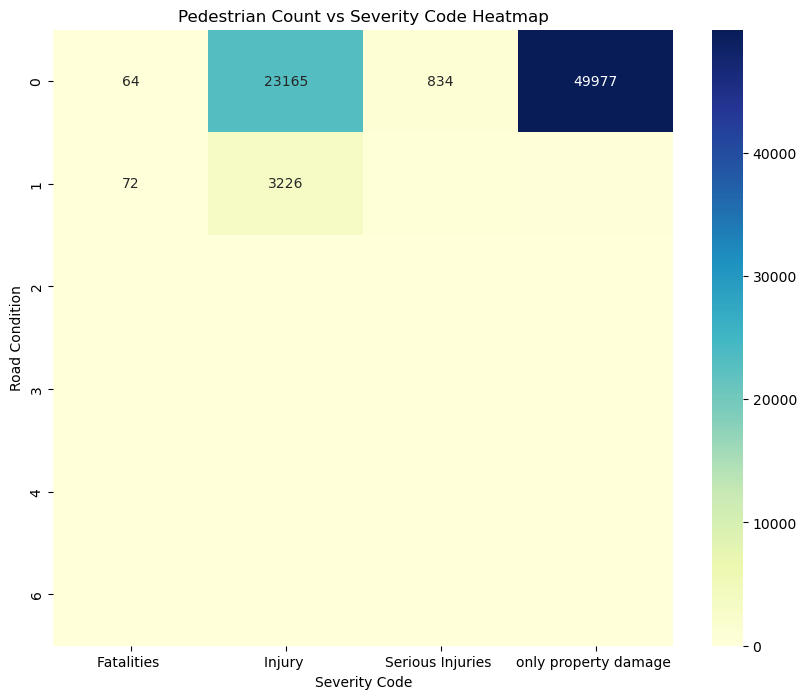

In [34]:
data1['SEVERITYCODE'] = data1['SEVERITYCODE'].astype(str)
data1['SEVERITYCODE'].replace({'0': 'only property damage ',
                                '1': 'Injury ',
                                '2': 'Serious Injuries ',
                                '3': 'Fatalities '},inplace=True)



road_severity_data = data1[['PEDCOUNT', 'SEVERITYCODE']]
# Create a cross-tabulation or pivot table
cross_tab = pd.crosstab(index=road_severity_data['PEDCOUNT'], columns=road_severity_data['SEVERITYCODE'])

#Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
heatmap.set_title('Pedestrian Count vs Severity Code Heatmap')
heatmap.set_xlabel('Severity Code')
heatmap.set_ylabel('Road Condition')
plt.show()

<h1></h1>
<p>&nbsp;</p>

### CONCLUSION
Gradient Boosting can handle various data types and complex relationships between features, such as location, environmental conditions, and collision characteristics.
Gradient Boosting is less prone to overfitting, which is crucial for accurate predictions on unseen data.
The algorithm automatically selects the most informative features, which is essential when dealing with a dataset containing a large number of features.
Gradient Boosting is not as interpretable as simpler models like Decision Trees, it provides insights into the importance of each feature, allowing stakeholders to understand the factors that contribute to collision severity.
radient Boosting is efficient and scalable, making it suitable for handling large datasets like the one described.
Gradient Boosting often outperforms other models, providing highly accurate predictions that can be crucial in addressing the problem of traffic collision severity.

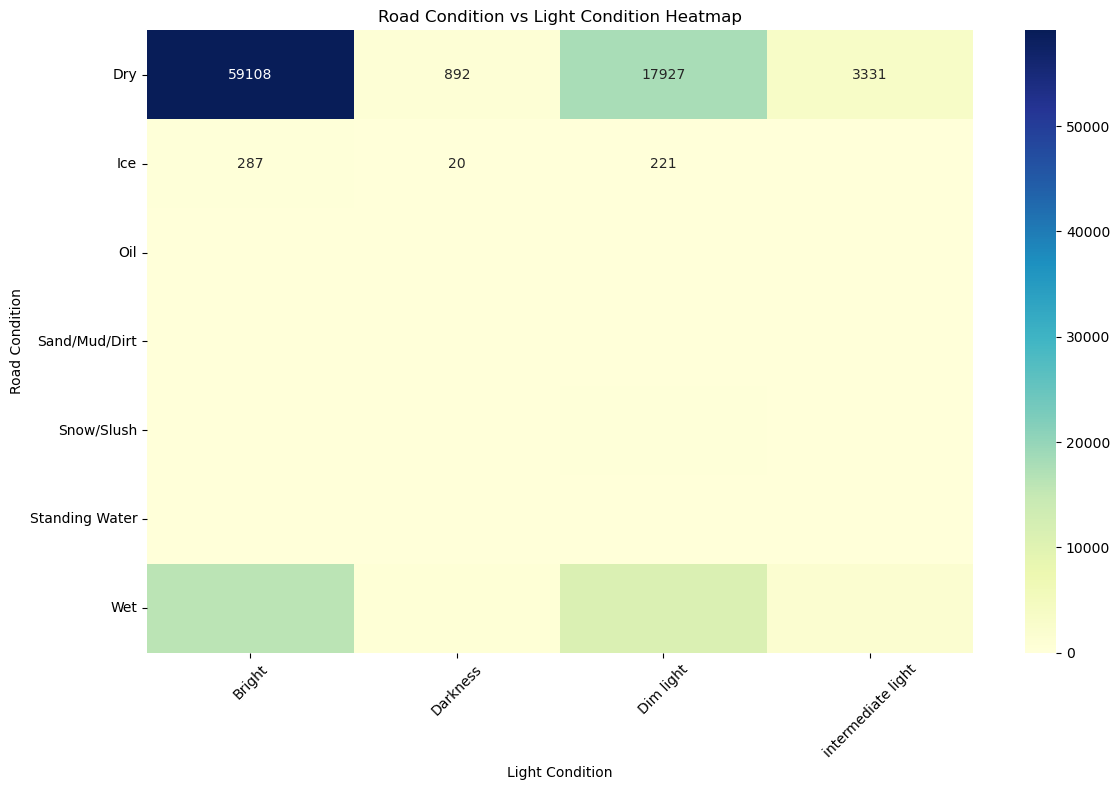

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\rehaa\OneDrive\Desktop\Technalytics_round3_dataset.csv")
data['LIGHTCOND'] = data['LIGHTCOND'].astype(str)
data['LIGHTCOND'].replace({'0': 'Darkness',
                                '1': 'Dim light',
                                '2': 'intermediate light',
                                '3': 'Bright'},inplace=True)

# Select relevant columns
road_light_data = data[['ROADCOND', 'LIGHTCOND']]

# Create a cross-tabulation or pivot table
cross_tab = pd.crosstab(index=road_light_data['ROADCOND'], columns=road_light_data['LIGHTCOND'])

# Convert integer values to strings in the cross-tabulation
cross_tab_str = cross_tab.astype(str)

# Convert string values to numeric values in the cross-tabulation
cross_tab_numeric = cross_tab_str.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap with adjusted figure size and aspect ratio
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(cross_tab_numeric, annot=True, fmt="d", cmap="YlGnBu")  # Use fmt="d" to format as integers
heatmap.set_title('Road Condition vs Light Condition Heatmap')
heatmap.set_xlabel('Light Condition')
heatmap.set_ylabel('Road Condition')

# Rotate axis labels if needed
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


In [ ]:
# Convert data to DataFrame
df = pd.DataFrame(data)

# Create a cross-tabulation or pivot table
cross_tab = pd.crosstab(index=df['ROADCOND'], columns=df['LIGHTCOND'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
heatmap.set_title('Road Condition vs Light Condition Heatmap')
heatmap.set_xlabel('Light Condition')
heatmap.set_ylabel('Road Condition')
plt.show()